In [ ]:
import pickle
import warnings

import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
def bar_metrics(resultsDict,city):
    df = pd.DataFrame.from_dict(resultsDict)
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    pallette = plt.cm.get_cmap("tab20c", len(df.columns))
    colors = [pallette(x) for x in range(len(df.columns))]
    color_dict = dict(zip(df.columns, colors))
    fig = plt.figure(figsize=(20, 15))

    # MAE plot
    fig.add_subplot(2, 2, 1)
    df.loc["mae"].sort_values().plot(
        kind="bar",
        colormap="Paired",
        color=[color_dict.get(x, "#333333") for x in df.loc["mae"].sort_values().index],
    )
    plt.legend()
    plt.title("MAE Metric, lower is better")
    fig.add_subplot(2, 2, 2)
    df.loc["rmse"].sort_values().plot(
        kind="bar",
        colormap="Paired",
        color=[
            color_dict.get(x, "#333333") for x in df.loc["rmse"].sort_values().index
        ],
    )
    plt.legend()
    plt.title("RMSE Metric, lower is better")
    fig.add_subplot(2, 2, 3)
    df.loc["mape"].sort_values().plot(
        kind="bar",
        colormap="Paired",
        color=[
            color_dict.get(x, "#333333") for x in df.loc["mape"].sort_values().index
        ],
    )
    plt.legend()
    plt.title("MAPE Metric, lower is better")
    fig.add_subplot(2, 2, 4)
    df.loc["r2"].sort_values(ascending=False).plot(
        kind="bar",
        colormap="Paired",
        color=[
            color_dict.get(x, "#333333")
            for x in df.loc["r2"].sort_values(ascending=False).index
        ],
    )
    plt.legend()
    plt.title("R2 Metric, higher is better")
    plt.tight_layout()
    plt.savefig("results/"+city+"/"+city+"_metrics.png")
    plt.show()


In [10]:


# from utils.plots import bar_metrics


# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['figure.figsize'] = 18, 8

city = 'Kolkata'

with open('results/'+city+'/'+city+'_scores.pickle', 'rb') as handle:
    resultsDict = pickle.load(handle)

# Load our results from the model notebook
with open('results/'+city+'/'+city+'_predictions.pickle', 'rb') as handle:
    predictionsDict = pickle.load(handle)

# Results analysis and discussion

#  Results

## Evaluation Metrics

There are many measures that can be used to analyze the performance of our prediction so we will be using the top 4 most used metrics for time series forecasting. Each of this metrics are different from the others in the way the test our predictions so don't expect a model to perform best in all metrics. Choosing the right metric for your problem is also a big challenge, this will depend on your forecasting needs.

* [Mean Absolute Error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error)
* [Mean Absolute Percentage Error (MAPE)](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)
* [Root Mean Squared Error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation)
* [R2 Coefficient of determination (r2)](https://en.wikipedia.org/wiki/Coefficient_of_determination)

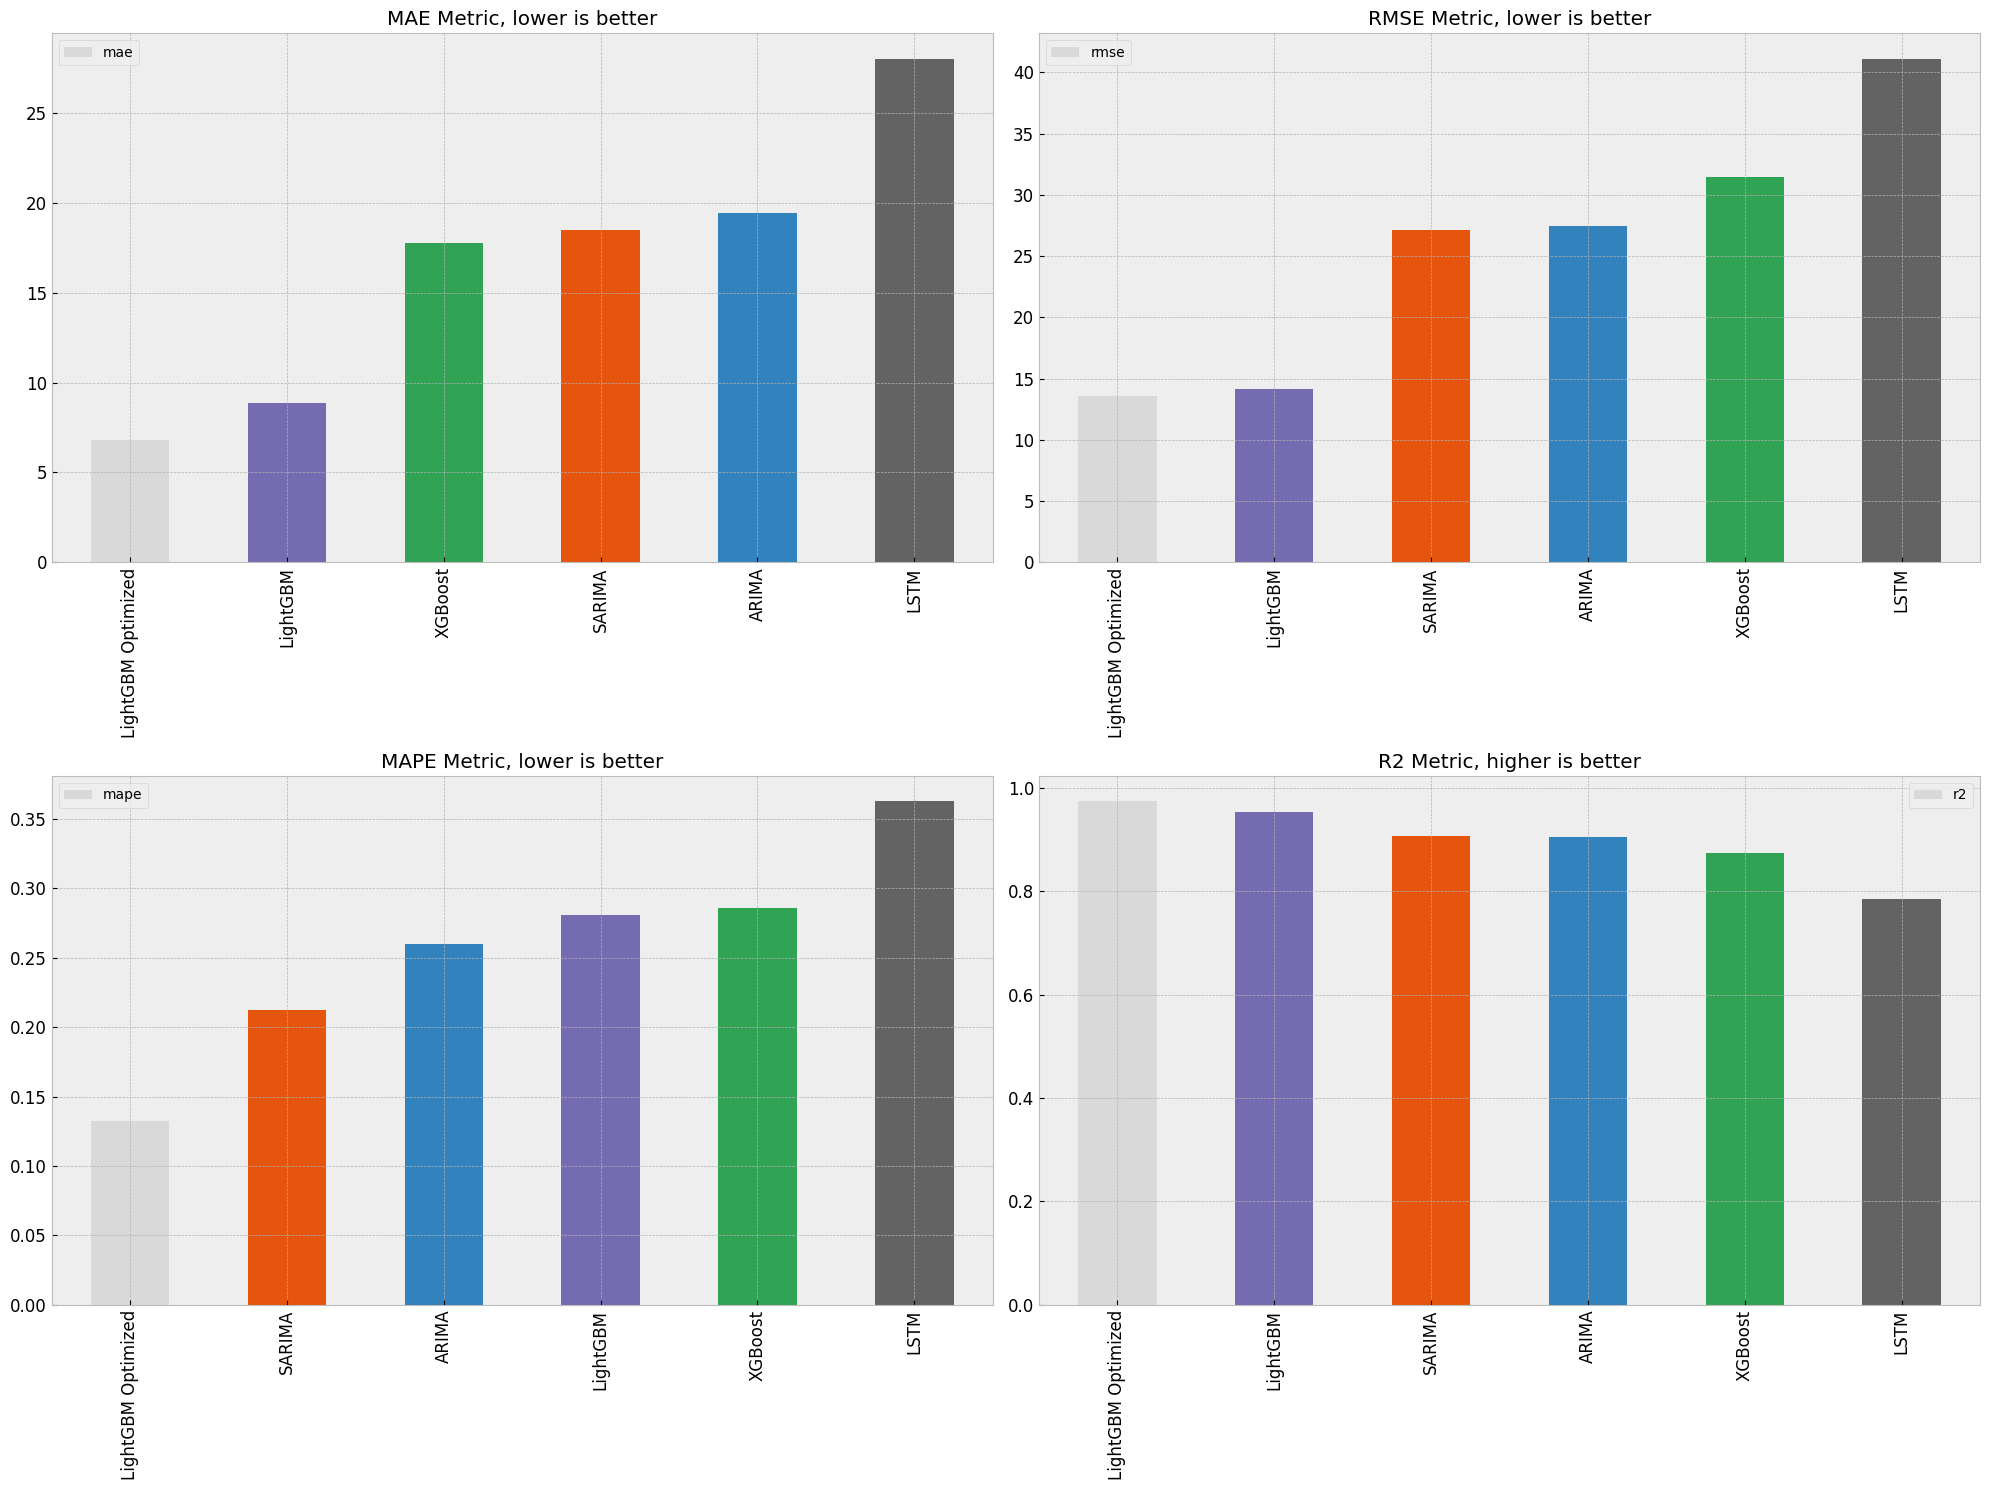

In [11]:
bar_metrics(resultsDict,city)

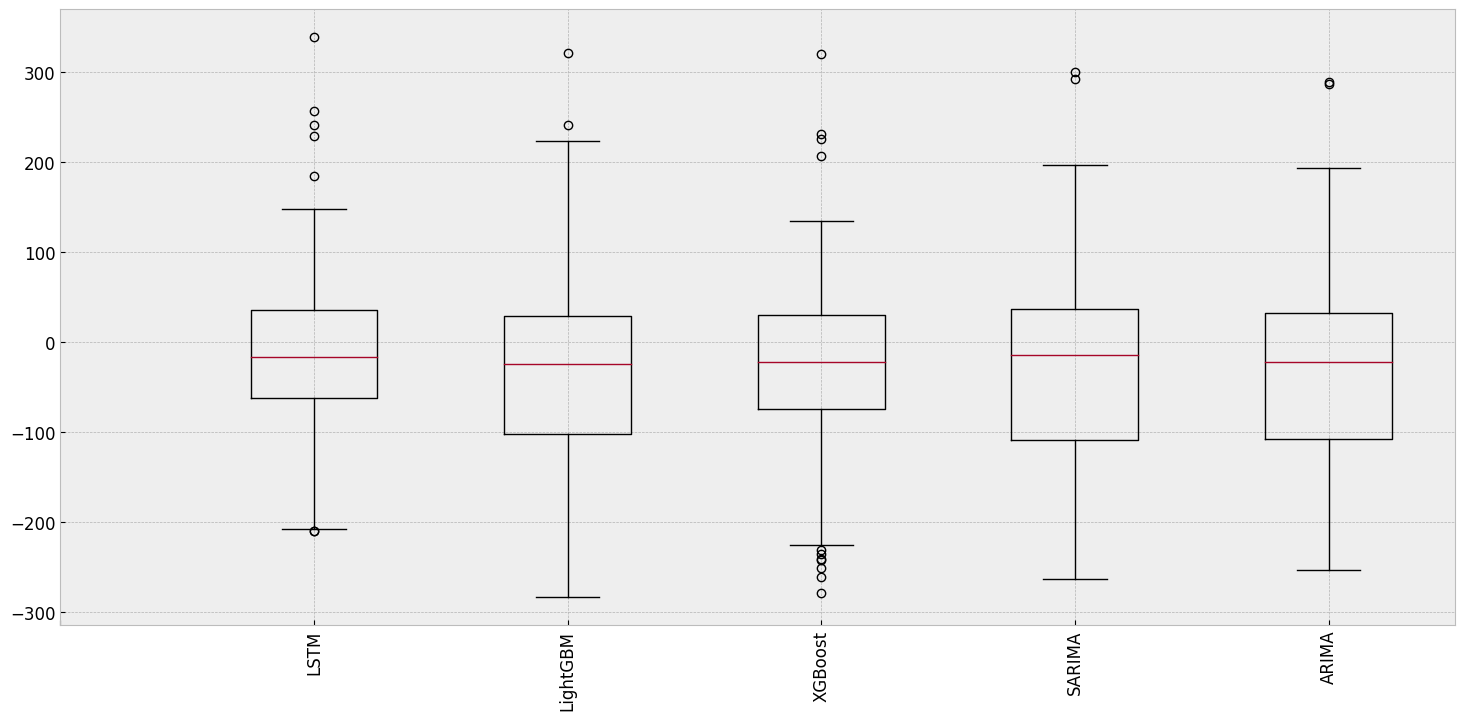

In [12]:
df_test = pd.read_csv("datasets/test.csv")
residuals = [df_test.pollution_today.values[-199:] - predictionsDict[u]
             for u in predictionsDict.keys()]
residuals.reverse()
plt.boxplot(residuals)
ticks = list(predictionsDict.keys())
ticks.reverse()
ticks = [''] + ticks
rang = range(0, len(ticks))
plt.xticks(rang, ticks, rotation='vertical')
plt.savefig("results/"+city+"/"+city+"_outliers.png")
pass

In [13]:
df = pd.DataFrame(resultsDict).transpose()

In [14]:
df

,mae,rmse,mape,r2
ARIMA,19.445235,27.454160,0.259655,0.904286
SARIMA,18.475138,27.112388,0.212368,0.906654
XGBoost,17.748486,31.481167,0.285882,0.874148
LightGBM,8.849182,14.137086,0.280401,0.954143
LSTM,28.017514,41.127531,0.362788,0.785204
LightGBM Optimized,6.789624,13.573126,0.132563,0.974621
